In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:

df = pd.read_excel('V_EXPORTACAO_E IMPORTACAO_POR MUNICIPIO_2019-01_2023-12_DT20240618.xlsx')
df.head()

,Fluxo,Ano,Mês,Código SH2,Descrição SH2,Código SH4,Descrição SH4,Código Seção,Descrição Seção,Município,Valor US$ FOB
0,Exportação,2019,01. Janeiro,68,"Obras de pedra, gesso, cimento, amianto, mica ...",6812,"Amianto (asbesto) trabalhado, em fibras; mistu...",XIII,"Obras de pedra, gesso, cimento, amianto, mica ...",Campinas - SP,0
1,Exportação,2019,12. Dezembro,22,"Bebidas, líquidos alcoólicos e vinagres",2201,"Águas, incluídas as águas minerais, naturais o...",IV,"Produtos das indútrias alimentares; Bebidas, l...",Campinas - SP,0
2,Exportação,2019,07. Julho,28,Produtos químicos inorgânicos; compostos inorg...,2835,"Fosfinatos (hipofosfitos), fosfonatos (fosfito...",VI,Produtos das indústrias químicas ou indústrias...,Campinas - SP,0
3,Importação,2019,04. Abril,49,"Livros, jornais, gravuras e outros produtos da...",4907,"Selos postais ou fiscais, não obliterados; pap...",X,Pastas de madeira ou de outras matérias fibros...,Campinas - SP,0
4,Exportação,2019,07. Julho,29,Produtos químicos orgânicos,2901,Hidrocarbonetos acíclicos,VI,Produtos das indústrias químicas ou indústrias...,Campinas - SP,1


In [ ]:
df_municipios = pd.read_excel('V_EXPORTACAO_E IMPORTACAO_POR MUNICIPIO_2019-01_2023-12_DT20240619 (2).xlsx')
df_municipios.head()

,Fluxo,Ano,Município,Código SH4,Descrição SH4,País,Valor US$ FOB
0,Exportação,2023,Guarulhos - SP,2710,"Óleos de petróleo ou de minerais betuminosos, ...",Brasil,316445284
1,Exportação,2023,Campinas - SP,2710,"Óleos de petróleo ou de minerais betuminosos, ...",Brasil,27904476
2,Exportação,2023,Brasília - DF,2710,"Óleos de petróleo ou de minerais betuminosos, ...",Brasil,16131266
3,Exportação,2023,Rio de Janeiro - RJ,2710,"Óleos de petróleo ou de minerais betuminosos, ...",Brasil,14765167
4,Exportação,2023,Manaus - AM,2710,"Óleos de petróleo ou de minerais betuminosos, ...",Brasil,2587847


In [ ]:
df.shape

(44512, 11)

In [ ]:
df.isnull().sum()

In [ ]:
export_df = df[df['Fluxo'] == 'Exportação']
import_df = df[df['Fluxo'] == 'Importação']

In [ ]:
export_value = export_df.iloc[:,-1].sum()
import_value = export_df.iloc[:,-1].sum()

In [ ]:
print(export_value)
print(import_value)

4768964397
4768964397


1) Campinas exporta mais do que importa  (em termos de valor total)?

Fluxo
Exportação     4768964397
Importação    15297087670
Name: Valor US$ FOB, dtype: int64


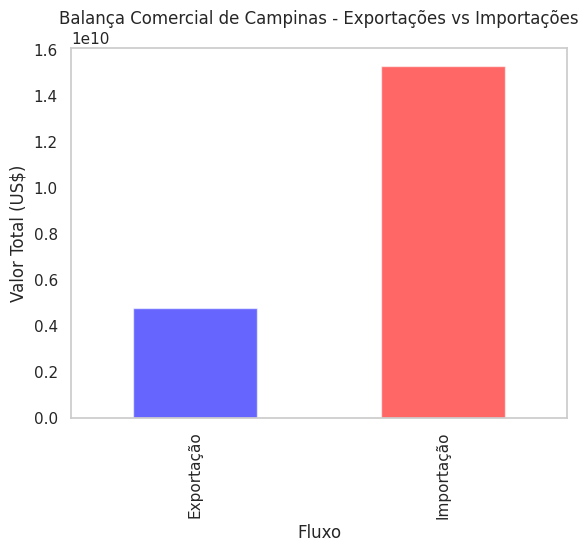

In [ ]:

balanca_comercial = df.groupby('Fluxo')['Valor US$ FOB'].sum()


print(balanca_comercial)

balanca_comercial.plot(kind='bar', color=['blue', 'red'], alpha=0.6)
plt.title('Balança Comercial de Campinas - Exportações vs Importações')
plt.ylabel('Valor Total (US$)')
plt.xlabel('Fluxo')
plt.grid(False)
plt.show()

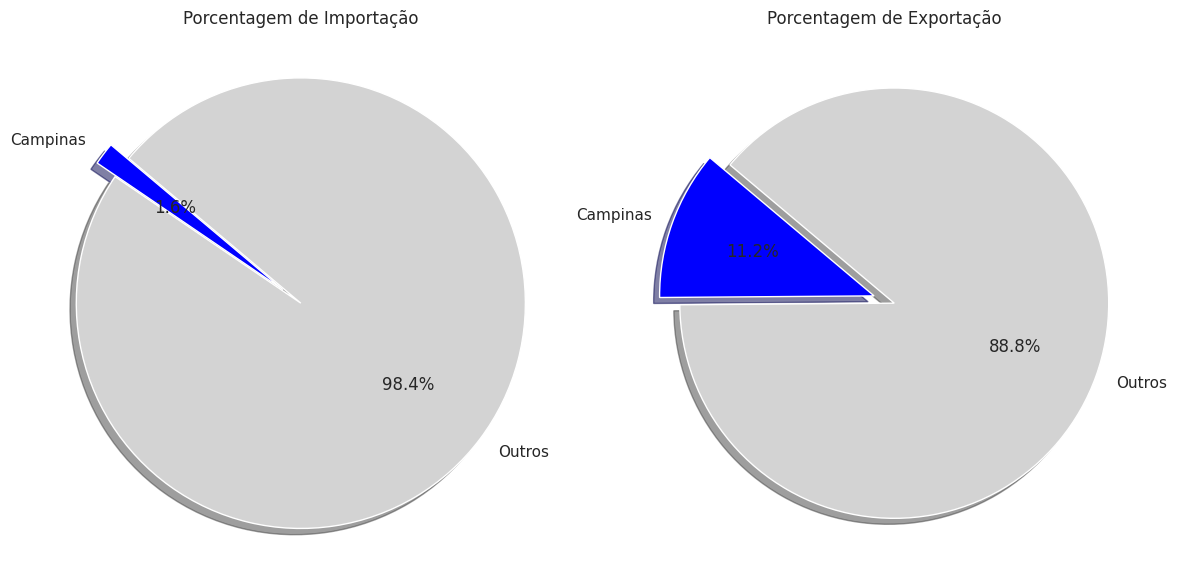

In [ ]:

df_export = df_municipios[df_municipios['Fluxo'] == 'Exportação']
df_import = df_municipios[df_municipios['Fluxo'] == 'Importação']


total_import = df_import['Valor US$ FOB'].sum()
total_export = df_export['Valor US$ FOB'].sum()


campinas_import = df_import[df_import['Município'] == 'Campinas - SP']['Valor US$ FOB'].sum()
campinas_export = df_export[df_export['Município'] == 'Campinas - SP']['Valor US$ FOB'].sum()


porcentagem_import_campinas = (campinas_import / total_import) * 100
porcentagem_export_campinas = (campinas_export / total_export) * 100

porcentagem_import_outros = 100 - porcentagem_import_campinas
porcentagem_export_outros = 100 - porcentagem_export_campinas


labels = ['Campinas', 'Outros']
sizes_import = [porcentagem_import_campinas, porcentagem_import_outros]
sizes_export = [porcentagem_export_campinas, porcentagem_export_outros]
colors = ['blue', 'lightgrey']
explode = (0.1, 0)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes_import, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Porcentagem de Importação')
plt.axis('equal')


plt.subplot(1, 2, 2)
plt.pie(sizes_export, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Porcentagem de Exportação')
plt.axis('equal')

plt.tight_layout()
plt.show()

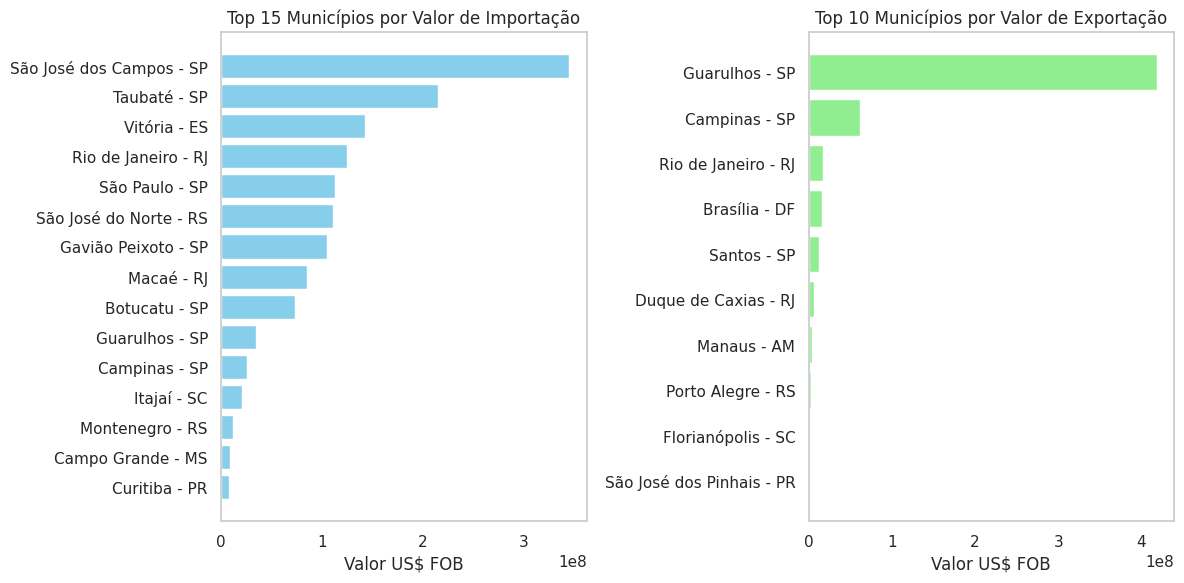

In [ ]:

df_export = df_municipios[df_municipios['Fluxo'] == 'Exportação']
df_import = df_municipios[df_municipios['Fluxo'] == 'Importação']


grouped_import = df_import.groupby('Município')['Valor US$ FOB'].sum().reset_index()
grouped_export = df_export.groupby('Município')['Valor US$ FOB'].sum().reset_index()


top_15_import = grouped_import.nlargest(15, 'Valor US$ FOB')
top_10_export = grouped_export.nlargest(10, 'Valor US$ FOB')


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(top_15_import['Município'], top_15_import['Valor US$ FOB'], color='skyblue')
plt.xlabel('Valor US$ FOB')
plt.title('Top 15 Municípios por Valor de Importação')
plt.gca().invert_yaxis()
plt.grid(False)


plt.subplot(1, 2, 2)
plt.barh(top_10_export['Município'], top_10_export['Valor US$ FOB'], color='lightgreen')
plt.xlabel('Valor US$ FOB')
plt.title('Top 10 Municípios por Valor de Exportação')
plt.gca().invert_yaxis()
plt.grid(False)

plt.tight_layout()
plt.show()

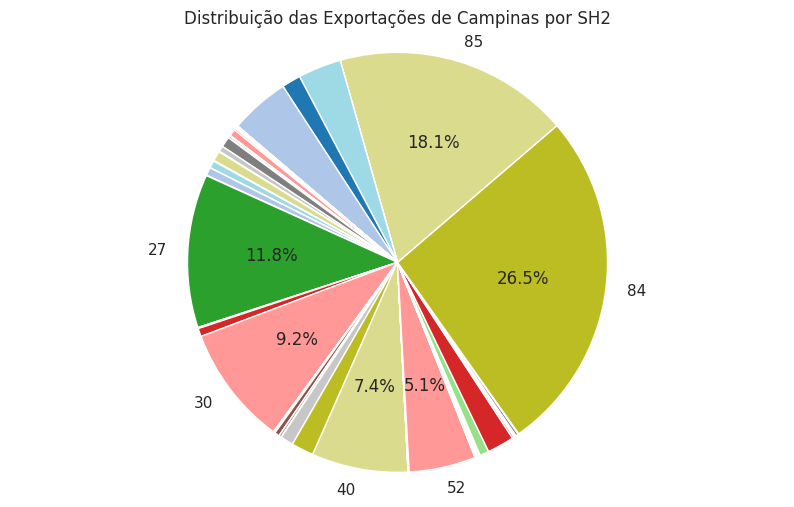

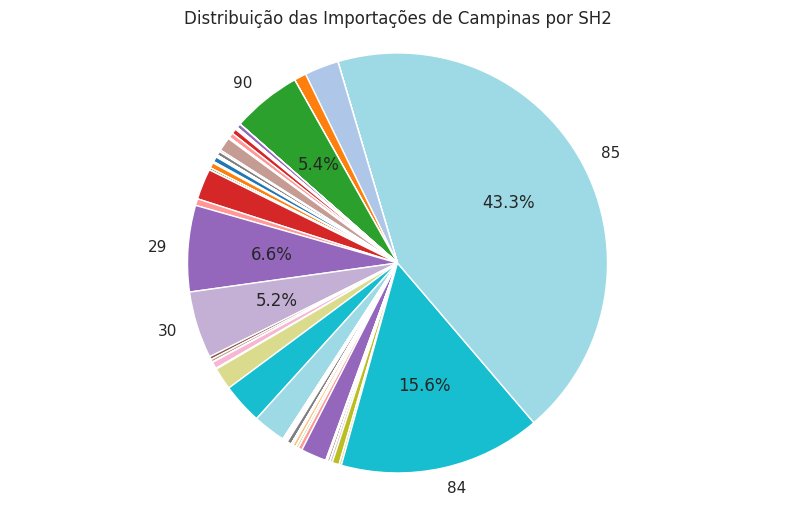

In [ ]:

export_sh2 = df[df['Fluxo'] == 'Exportação'].groupby(['Código SH2'])['Valor US$ FOB'].sum().reset_index()
import_sh2 = df[df['Fluxo'] == 'Importação'].groupby(['Código SH2'])['Valor US$ FOB'].sum().reset_index()


export_sh2['Percentual'] = (export_sh2['Valor US$ FOB'] / export_sh2['Valor US$ FOB'].sum()) * 100
import_sh2['Percentual'] = (import_sh2['Valor US$ FOB'] / import_sh2['Valor US$ FOB'].sum()) * 100


def make_autopct(percent_values):
    def my_autopct(pct):
        return ('%.1f%%' % pct) if pct > 5 else ''
    return my_autopct


plt.figure(figsize=(10, 6))
plt.pie(
    export_sh2['Valor US$ FOB'],
    labels=[desc if perc > 5 else '' for desc, perc in zip(export_sh2['Código SH2'], export_sh2['Percentual'])],
    autopct=make_autopct(export_sh2['Percentual']),
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Distribuição das Exportações de Campinas por SH2')
plt.axis('equal')
plt.show()


plt.figure(figsize=(10, 6))
plt.pie(
    import_sh2['Valor US$ FOB'],
    labels=[desc if perc > 5 else '' for desc, perc in zip(import_sh2['Código SH2'], import_sh2['Percentual'])],
    autopct=make_autopct(import_sh2['Percentual']),
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Distribuição das Importações de Campinas por SH2')
plt.axis('equal')
plt.show()

2) Quais produtos são os mais relevantes na balança comercial do município?

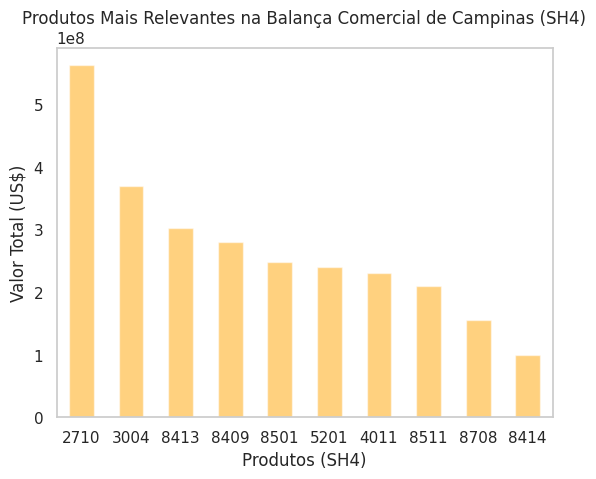

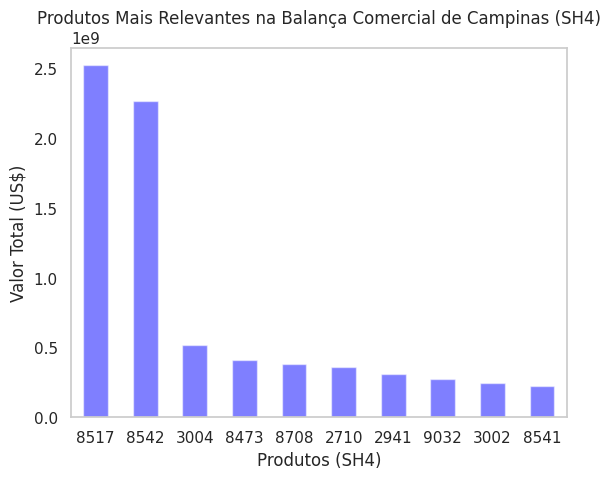

In [ ]:
df_export = df[(df['Fluxo'] == 'Exportação')]
df_import = df[(df['Fluxo'] == 'Importação')]



produtos_relevantes_sh4 = df_export.groupby(['Código SH4'])['Valor US$ FOB'].sum().sort_values(ascending=False).head(10)


produtos_relevantes_sh4.plot(kind='bar', color='orange', alpha=0.5)
plt.title('Produtos Mais Relevantes na Balança Comercial de Campinas (SH4)')
plt.ylabel('Valor Total (US$)')
plt.xlabel('Produtos (SH4)')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()






produtos_relevantes_sh4 = df_import.groupby(['Código SH4'])['Valor US$ FOB'].sum().sort_values(ascending=False).head(10)


produtos_relevantes_sh4.plot(kind='bar', color='blue', alpha=0.5)
plt.title('Produtos Mais Relevantes na Balança Comercial de Campinas (SH4)')
plt.ylabel('Valor Total (US$)')
plt.xlabel('Produtos (SH4)')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


3) Existe alguma tendência ou novidade nos produtos importados ou exportados? Por exemplo, nos últimos anos Campinas começou a exportar algo que importava? Ou, parou de importar/exportar determinado produto. Ou teve uma aumento/redução no comércio desses produtos?

In [ ]:

df_import_2019 = df[(df['Fluxo'] == 'Importação') & (df['Ano'] == 2019)]
df_import_2020 = df[(df['Fluxo'] == 'Importação') & (df['Ano'] == 2020)]
df_import_2021 = df[(df['Fluxo'] == 'Importação') & (df['Ano'] == 2021)]
df_import_2022 = df[(df['Fluxo'] == 'Importação') & (df['Ano'] == 2022)]
df_import_2023 = df[(df['Fluxo'] == 'Importação') & (df['Ano'] == 2023)]


df_export_2019 = df[(df['Fluxo'] == 'Exportação') & (df['Ano'] == 2019)]
df_export_2020 = df[(df['Fluxo'] == 'Exportação') & (df['Ano'] == 2020)]
df_export_2021 = df[(df['Fluxo'] == 'Exportação') & (df['Ano'] == 2021)]
df_export_2022 = df[(df['Fluxo'] == 'Exportação') & (df['Ano'] == 2022)]
df_export_2023 = df[(df['Fluxo'] == 'Exportação') & (df['Ano'] == 2023)]


produtos_importados_2019 = set(df_import_2019['Código SH4'].unique())
produtos_importados_2020 = set(df_import_2020['Código SH4'].unique())
produtos_importados_2021 = set(df_import_2021['Código SH4'].unique())
produtos_importados_2022 = set(df_import_2022['Código SH4'].unique())
produtos_importados_2023 = set(df_import_2023['Código SH4'].unique())


produtos_exportados_2019 = set(df_export_2019['Código SH4'].unique())
produtos_exportados_2020 = set(df_export_2020['Código SH4'].unique())
produtos_exportados_2021 = set(df_export_2021['Código SH4'].unique())
produtos_exportados_2022 = set(df_export_2022['Código SH4'].unique())
produtos_exportados_2023 = set(df_export_2023['Código SH4'].unique())


produtos_importados_ate_2022 = (
    produtos_importados_2019 |
    produtos_importados_2020 |
    produtos_importados_2021 |
    produtos_importados_2022
)
produtos_exportados_em_2023 = produtos_exportados_2023 - (
    produtos_exportados_2019 |
    produtos_exportados_2020 |
    produtos_exportados_2021 |
    produtos_exportados_2022
)
produtos_importados_exportados_em_2023 = (
    produtos_importados_ate_2022 &
    produtos_exportados_em_2023
)


df_top_exportados = df_export_2023[df_export_2023['Código SH4'].isin(produtos_importados_exportados_em_2023)]


valores_acumulados_export = df_top_exportados.groupby('Código SH4')['Valor US$ FOB'].sum().reset_index()


top_3_export = valores_acumulados_export.sort_values(by='Valor US$ FOB', ascending=False).head(3)


df_top_export = pd.DataFrame(top_3_export, columns=['Código SH4', 'Valor US$ FOB'])

print("Produtos que eram apenas importados até 2022 e começaram a ser exportados em 2023 (Exportação):")
df_top_export

Produtos que eram apenas importados até 2022 e começaram a ser exportados em 2023 (Exportação):


,Código SH4,Valor US$ FOB
0,701,225556
3,2008,30694
16,8213,17165


In [ ]:
anos = [2019, 2020, 2021, 2022, 2023]
dfs_import = {ano: df[(df['Fluxo'] == 'Importação') & (df['Ano'] == ano)] for ano in anos}
dfs_export = {ano: df[(df['Fluxo'] == 'Exportação') & (df['Ano'] == ano)] for ano in anos}


produtos_importados_consistentes = set(dfs_import[2019]['Código SH4'].unique())
produtos_exportados_consistentes = set(dfs_export[2019]['Código SH4'].unique())

for ano in [2020, 2021, 2022]:
    produtos_importados_consistentes.intersection_update(dfs_import[ano]['Código SH4'].unique())
    produtos_exportados_consistentes.intersection_update(dfs_export[ano]['Código SH4'].unique())


produtos_nao_importados_2023 = produtos_importados_consistentes - set(dfs_import[2023]['Código SH4'].unique())
produtos_nao_exportados_2023 = produtos_exportados_consistentes - set(dfs_export[2023]['Código SH4'].unique())


df_import_2019_2022 = df[(df['Fluxo'] == 'Importação') & (df['Ano'].isin([2019, 2020, 2021, 2022]))]
df_export_2019_2022 = df[(df['Fluxo'] == 'Exportação') & (df['Ano'].isin([2019, 2020, 2021, 2022]))]


valores_acumulados_import = df_import_2019_2022[df_import_2019_2022['Código SH4'].isin(produtos_nao_importados_2023)]
valores_acumulados_import = valores_acumulados_import.groupby('Código SH4')['Valor US$ FOB'].sum().reset_index()
valores_acumulados_import = valores_acumulados_import.sort_values(by='Valor US$ FOB', ascending=False).head(3)

valores_acumulados_export = df_export_2019_2022[df_export_2019_2022['Código SH4'].isin(produtos_nao_exportados_2023)]
valores_acumulados_export = valores_acumulados_export.groupby('Código SH4')['Valor US$ FOB'].sum().reset_index()
valores_acumulados_export = valores_acumulados_export.sort_values(by='Valor US$ FOB', ascending=False).head(3)


df_top_importados = pd.DataFrame({
    'Código SH4': valores_acumulados_import['Código SH4'],
    'Valor Acumulado Importado': valores_acumulados_import['Valor US$ FOB']
})

df_top_exportados = pd.DataFrame({
    'Código SH4': valores_acumulados_export['Código SH4'],
    'Valor Acumulado Exportado': valores_acumulados_export['Valor US$ FOB']
})


print("Top 3 produtos que foram consistentemente importados de 2019 a 2022 e não foram importados em 2023:")
print(df_top_importados)

print("\nTop 3 produtos que foram consistentemente exportados de 2019 a 2022 e não foram exportados em 2023:")
print(df_top_exportados)


Top 3 produtos que foram consistentemente importados de 2019 a 2022 e não foram importados em 2023:
    Código SH4  Valor Acumulado Importado
27        8803                   72205449
26        8704                    5977664
5         2512                    2311793

Top 3 produtos que foram consistentemente exportados de 2019 a 2022 e não foram exportados em 2023:
    Código SH4  Valor Acumulado Exportado
26        8803                   53162533
25        8439                    1558521
9         2935                     622462


In [ ]:
df_top_importados

,Código SH4,Valor Acumulado Importado
27,8803,72205449
26,8704,5977664
5,2512,2311793


In [ ]:
df_top_exportados

,Código SH4,Valor Acumulado Exportado
26,8803,53162533
25,8439,1558521
9,2935,622462


4) A exportação/importação de algum produto é relevante a nível nacional (i.e. é uma porcentagem significativa) ?

In [ ]:
df_export = df_municipios[(df_municipios['Fluxo'] == 'Exportação')]
df_export = df_municipios[(df_municipios['Município'] == 'Campinas - SP')]

Código SH4
2803    84.759185
4908    84.702580
4010    84.644702
Name: Valor US$ FOB, dtype: float64


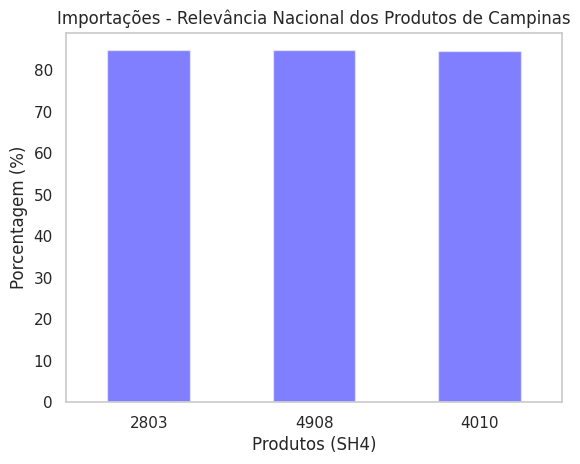

In [ ]:
df_import = df_municipios[(df_municipios['Fluxo'] == 'Importação')]
df_import_camp = df_import[(df_import['Município'] == 'Campinas - SP')]


produtos_campinas_sh4 = df_import_camp.groupby(['Código SH4'])['Valor US$ FOB'].sum()
produtos_nacionais_sh4 = df_import.groupby(['Código SH4'])['Valor US$ FOB'].sum()


relevancia_nacional_sh4 = (produtos_campinas_sh4 / produtos_nacionais_sh4) * 100
relevancia_nacional_sh4 = relevancia_nacional_sh4[relevancia_nacional_sh4 < 90]


relevancia_nacional_sh4 = relevancia_nacional_sh4.sort_values(ascending=False).head(3)
print(relevancia_nacional_sh4)


relevancia_nacional_sh4.plot(kind='bar', color='blue', alpha=0.5)
plt.title('Importações - Relevância Nacional dos Produtos de Campinas')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Produtos (SH4)')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

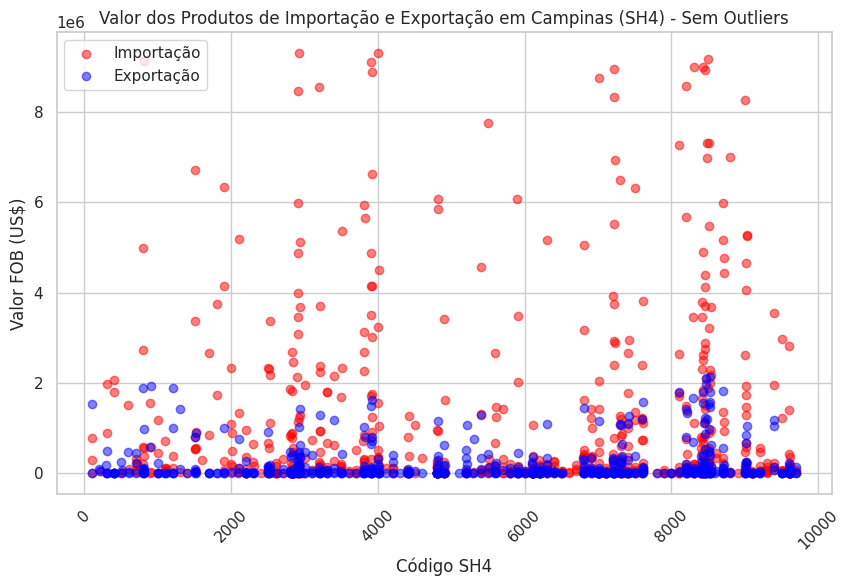

In [ ]:

df_export = df[df['Fluxo'] == 'Exportação']
df_import = df[df['Fluxo'] == 'Importação']


produtos_campinas_sh4_import = df_import.groupby(['Código SH4'])['Valor US$ FOB'].sum().reset_index()
produtos_campinas_sh4_export = df_export.groupby(['Código SH4'])['Valor US$ FOB'].sum().reset_index()


Q1_import = produtos_campinas_sh4_import['Valor US$ FOB'].quantile(0.25)
Q3_import = produtos_campinas_sh4_import['Valor US$ FOB'].quantile(0.75)
IQR_import = Q3_import - Q1_import

Q1_export = produtos_campinas_sh4_export['Valor US$ FOB'].quantile(0.25)
Q3_export = produtos_campinas_sh4_export['Valor US$ FOB'].quantile(0.75)
IQR_export = Q3_export - Q1_export


lower_limit_import = Q1_import - 1.5 * IQR_import
upper_limit_import = Q3_import + 1.5 * IQR_import

lower_limit_export = Q1_export - 1.5 * IQR_export
upper_limit_export = Q3_export + 1.5 * IQR_export


produtos_campinas_sh4_import = produtos_campinas_sh4_import[(produtos_campinas_sh4_import['Valor US$ FOB'] >= lower_limit_import) & (produtos_campinas_sh4_import['Valor US$ FOB'] <= upper_limit_import)]
produtos_campinas_sh4_export = produtos_campinas_sh4_export[(produtos_campinas_sh4_export['Valor US$ FOB'] >= lower_limit_export) & (produtos_campinas_sh4_export['Valor US$ FOB'] <= upper_limit_export)]


plt.figure(figsize=(10, 6))
plt.scatter(produtos_campinas_sh4_import['Código SH4'], produtos_campinas_sh4_import['Valor US$ FOB'], color='red', alpha=0.5, label='Importação')
plt.scatter(produtos_campinas_sh4_export['Código SH4'], produtos_campinas_sh4_export['Valor US$ FOB'], color='blue', alpha=0.5, label='Exportação')
plt.title('Valor dos Produtos de Importação e Exportação em Campinas (SH4) - Sem Outliers')
plt.xlabel('Código SH4')
plt.ylabel('Valor FOB (US$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

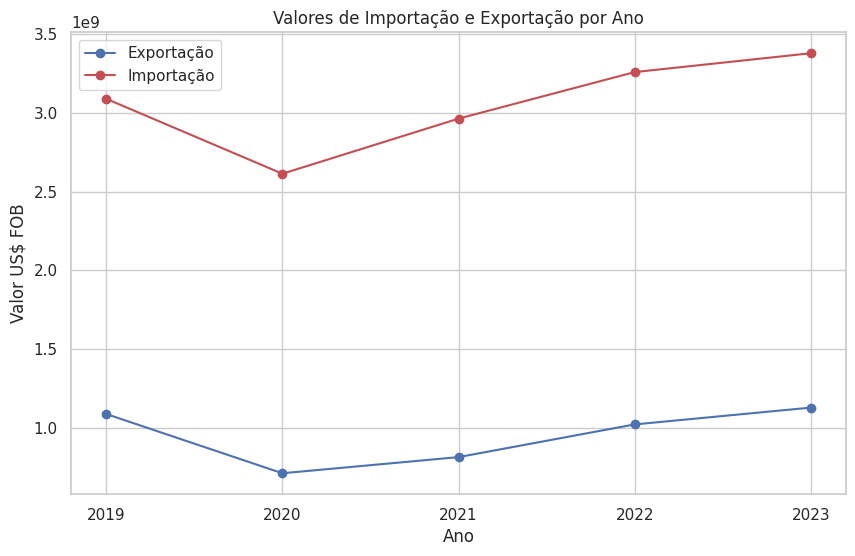

In [ ]:
df_export = df[(df['Fluxo'] == 'Exportação')]
df_import = df[(df['Fluxo'] == 'Importação')]


exportacao_por_ano = df_export.groupby('Ano')['Valor US$ FOB'].sum()
importacao_por_ano = df_import.groupby('Ano')['Valor US$ FOB'].sum()


plt.figure(figsize=(10, 6))
plt.plot(exportacao_por_ano.index, exportacao_por_ano.values, marker='o', linestyle='-', color='b', label='Exportação')
plt.plot(importacao_por_ano.index, importacao_por_ano.values, marker='o', linestyle='-', color='r', label='Importação')
plt.title('Valores de Importação e Exportação por Ano')
plt.xlabel('Ano')
plt.ylabel('Valor US$ FOB')
plt.xticks(exportacao_por_ano.index)
plt.legend()
plt.grid(True)
plt.show()